In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# Initializing random dataset

In [45]:
x = [i for i in range(10)]
y = [14, 16, 15, 18, 31, 26, 36, 32, 33, 37]
# y = random.sample(range(50),10)

# Adding abline function to make life easier

In [46]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

Plotting the data to see if a linear relationship is observed


(0.0, 50.0)

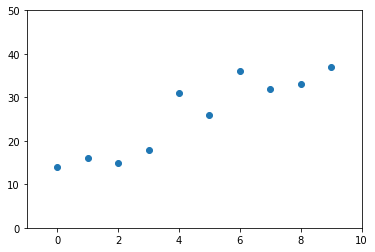

In [47]:
plt.plot(x,y, 'o', )
plt.xlim([-1,10])
plt.ylim([0,50])

We can see the linear relationship. The next step will be to calculate sum of least squares off different slope and y-intercepts of the following equation:

$y=mx+c$


where m=slope, c=y-int

In [48]:
##This is the simplest way to get the best fit line
##It calculates all the possible pairs of slope and intercept and find the least sum of square
##A smarter implementation will be gradient descent, but that is another task for another time.

def best_fit(x:list,y:list, startc:int = -20, startm:int = -20, step:float = 0.1):
    
    ##populating the least SS matrix
    residuals = []
    for m in np.arange(startm,startm*-1,step):
        cres=[]
        for c in np.arange(startc,startc*-1,step):       
            ss=[]
            for i,j in zip(x,y):
                yval = m*i+c
                dis = (j - yval)**2
                ss.append(dis)
            cres.append(sum(ss))
        residuals.append(cres)
    
    ##using numpy to find Least SS
    res = np.array(residuals)
    minm = np.where(res == np.min(res))[0][0]
    minc = np.where(res == np.min(res))[1][0]
    minss = np.min(res)
    ## best fit line parameteres
    bestm = minm*step + startm
    bestc = minc*step + startc
    return bestm, bestc, minss

In [49]:
bestm, bestc, minss= best_fit(x,y)

Plotting the fitted line (orange) on the graph along with the mean of y line (green). 

We can clearly see the fitted line is a better fit.

Next step is to calculate $R^2$.

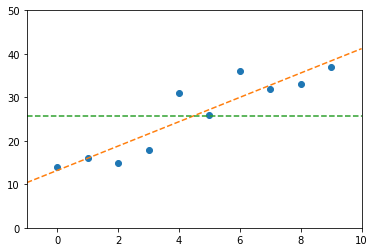

In [50]:
plt.plot(x,y, 'o', )
plt.xlim([-1,10])
plt.ylim([0,50])
abline(bestm,bestc) #orange
abline(0, sum(y)/len(y)) #green

# Calculating $R^2$
    
 $$R^2=\frac{Var(mean) - Var(fit)}{Var(mean)}$$

where mean = mean of y (green line), fit = best fitted line (orange line)



In [51]:
ymean = sum(y)/len(y)
varmean = sum([(i-ymean)**2 for i in y])/len(y)
varfit = minss/len(y)
R2 = (varmean-varfit)/varmean
print(f'R-squared: {R2:.4f}')
print(f'This means that x can explain {R2*100:.2f}% of the variation in y')

R-squared: 0.8441
This means that x can explain 84.41% of the variation in y


# Calculating p-value

This is the equation for F

$$F = \frac{\frac{SS(mean)-SS(fit)}{(p{_{fit}} - p{_{mean}})}}{\frac{SS(fit)}{(n-p{_{fit}})}}$$


It essentially calculates the variation explained by the fit over the variation not explained by the fit, taking degrees of freedom into account


We have our F value now. The next step will be to either construct an F histogram or consult the F-table.

To save time, we are just going to use scipy for F values.

In [52]:
dfn = 2-1
dfd = len(y) - 2
F = ((varmean - varfit)/dfn)/(varfit/dfd)

Fcrit = scipy.stats.f.ppf(1-0.5, dfn, dfd)
print(f'F-value: {F}')
print(f'Fcrit: {Fcrit}')
if F > Fcrit:
    print('Since F is larger than Fcrit, this regression has a p-value < 0.05')
else:
    print('Since F is not larger than Fcrit, this regression has a p-value > 0.05')

F-value: 43.32432432432405
Fcrit: 0.49898204652384914
Since F is larger than Fcrit, this regression has a p-value < 0.05
